## **Notebook to make predictions with reprocessed Yoneda data and EFLUX2** 

By Christina Schenk and Garrett Roell

Tested on biodesign_3.7 kernel on jprime

### EFLUX2 predictions and evaluations
This notebook predicts fluxes for R. opacus cultures growing with phenol. The data was published in [Henson (2018)](https://www.sciencedirect.com/science/article/pii/S1096717618300910).

#### **Data Labels:**
                                                 
#### Henson:
* WT 0.5g/L Phenol 		(**WT-P**)
* PVHG6 0.5g/L  Phenol 	(**PVHG-P**)
                                               

### Method: 
<ol>
<li>Predict fluxes with EFLUX2</li>
<li>Compare predictions with 13CMFA: Scatter plots and flux maps</li>
<li>Load file with observed growth rates (Notebook E)</li>
<li>Save growth rate predictions to csv file</li>
</ol>



##### **Import python packages**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import cobra
import scipy.stats
#import cplex
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import matplotlib.image as mpimg
import matplotlib.cm as cm

from edd_utils import login, export_study, export_metadata

from sklearn.metrics import r2_score

SourceDir = '../src'
sys.path.append(SourceDir)
from ensemblemethods import EFlux2
from utils import *

output_dir = '../plots/CPM/'
from plot import *

##### **Load data**

In [2]:
# # Study to Download
# study_slug = 'biodesign_yoneda_set3_reprocessed'
# # EDD server
# edd_server = 'public-edd.jbei.org'
# user       = 'schenkch'

In [3]:
# session = login(edd_server=edd_server, user=user)

# df = export_study(session, study_slug, edd_server=edd_server)
# #df.head()

##### **Filter transcriptomics data from all EDD data into different dataframes**

In [4]:
# df_Trans = df[df['Protocol'].str.contains('Transcriptomics')]
# df_Trans.head()

In [5]:
df_trans = pd.read_csv('../transcript_data/csv/henson_CPM_melted.csv')
df_trans.head()

,Line Name,Measurement Type,Time,Count,Units
0,WT-M-R1,WP_005263480_1,20,19.003420,CPM
1,WT-M-R2,WP_005263480_1,20,16.800668,CPM
2,WT-M-R3,WP_005263480_1,20,12.955220,CPM
3,WT-M-R1,WP_005263480_1,32,10.984975,CPM
4,WT-M-R2,WP_005263480_1,32,9.520107,CPM


In [6]:
# time could be 21 or 24
df_trans = df_trans[df_trans['Time'] == 21 ]
df_trans.head()

,Line Name,Measurement Type,Time,Count,Units
38,PVHG-P-R1,WP_005263480_1,21,14.662250,CPM
39,PVHG-P-R2,WP_005263480_1,21,17.618488,CPM
40,PVHG-P-R3,WP_005263480_1,21,19.200195,CPM
92,PVHG-P-R1,WP_005249107_1,21,312.418712,CPM
93,PVHG-P-R2,WP_005249107_1,21,293.171633,CPM


##### **Load Genome Scale Model**

In [7]:
model = cobra.io.read_sbml_model("../GSMs/Ropacus_annotated.xml")

#### **1. EFLUX2 Predictions for Wild type**

In [8]:
eflux2sol, eflux2sol_std = eflux2_pred_for_three_reps(model, df_trans, 'WT-P-R1', 'WT-P-R2','WT-P-R3', 'phenol')

running first replicate
FBA status optimal
FBA solution 0.0


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 0.0
running second replicate
FBA status optimal
FBA solution 0.0


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 0.0
running third replicate
FBA status optimal
FBA solution 0.0


{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

EFlux2 status optimal
EFlux2 solution 0.0


##### **Save solution to data frame**

In [9]:
eflux2soldf = pd.DataFrame(eflux2sol, columns=['fluxes'])
eflux2solstddf = pd.DataFrame(eflux2sol_std, columns=['stds'])

#### **2. Plot solutions: Comparison of EFLUX2 WT predictions and 13c measurements**

##### **Load 13cdata**

#####  **Get 13C MFA measured fluxes for phenol**

In [10]:
phenol_fluxes = pd.read_csv('../13C_flux_data/13C_phenol_flux_data.csv')

# Remove rows that do not have a mapping to the GSM
phenol_fluxes.dropna(subset = ["Forward Reactions"], inplace=True)
print(f'There are {len(phenol_fluxes)} fluxes that can be compared between the MFA and FBA')
phenol_fluxes

There are 44 fluxes that can be compared between the MFA and FBA


,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",1.000000e+02,1.000000e+02,100.0000
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-4.793000e-01,-1.421900e+00,0.9306
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.000000e+00,-2.000000e+00,-0.7683
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.000000e+00,-2.000000e+00,-0.7683
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.000000e+00,-2.000000e+00,-0.7683
5,EMP Pathway,GAPD or reverse_GAPDi_nadp,"GAP <-> G1,3P","(-220, 30)",-1.079070e+01,-1.122350e+01,-9.1040
6,EMP Pathway,reverse_PGK,"G1,3P <-> 3PG + ATP + NADH","(-220, -55)",-1.079070e+01,-1.122350e+01,-9.1040
7,EMP Pathway,reverse_PGM,3PG <-> 2PG,"(-220, -135)",-1.625380e+01,-1.695560e+01,-13.6034
8,EMP Pathway,ENO,2PG <-> PEP,"(-220, -215)",-1.625380e+01,-1.695560e+01,-13.6034
9,EMP Pathway,ACMANApts or reverse_PPS or PYK or FRUptspp or...,PEP <-> Pyr + ATP,"(-220, -295)",2.999990e+01,0.000000e+00,30.0000


##### **Add Phenol EFLUX2 flux values to phenol fluxes dataframe**

In [11]:
obspred_fluxes = add_pred_fluxes_to_13c_df(phenol_fluxes, eflux2soldf, eflux2solstddf, 'phenol', 'E-Flux2', 'WT')
obspred_fluxes.to_csv('../13C_flux_data/obspredfluxes_phenol_EFLUX2_CPM.csv', index=True, header= True)
obspred_fluxes.head()

,Pathway,Forward Reactions,Reaction,Location on map,Flux,90% Confidence Lower Bound,90% Confidence Upper Bound,E-Flux2 WT Value,E-Flux2 WT std Value
0,Substrate Uptake,PHEMOX,Phenol.ext -> AcCoA + SucCoA,"( 80, -450)",100.0000,100.0000,100.0000,NaN,NaN
1,EMP Pathway,PGI,G6P <-> F6P,"(-150, 430)",-0.4793,-1.4219,0.9306,NaN,NaN
2,EMP Pathway,PFK or reverse_FBP,F6P + ATP -> FBP,"(-220, 195)",-2.0000,-2.0000,-0.7683,NaN,NaN
3,EMP Pathway,FBA,FBP <-> DHAP + GAP,"(-140, 115)",-2.0000,-2.0000,-0.7683,NaN,NaN
4,EMP Pathway,TPI,DHAP <-> GAP,"(-270, 150)",-2.0000,-2.0000,-0.7683,NaN,NaN


### **Plot EFLUX2 vs 13C MFA**

##### **Plot 13C MFA observations vs. EFLUX2 predictions**

##### Scatter plot: 13CMFA vs. EFLUX2

In [12]:
# scatterplotcomp_obs_vs_pred(obspred_fluxes, substrate='phenol', method='E-Flux2', strain='WT')

##### **Plot 13C MFA observations vs. EFLUX2 predictions with confidence intervals**

##### Scatter plot with standard deviations: 13CMFA vs. EFLUX2

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

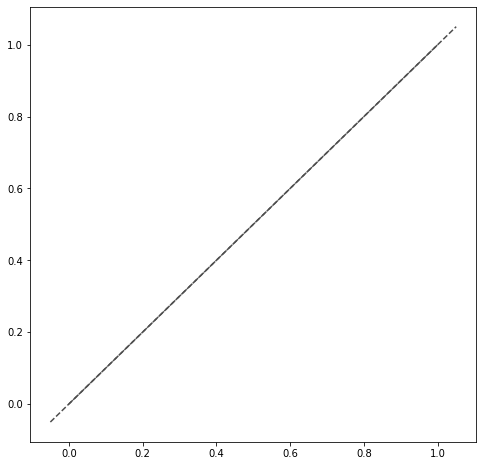

In [13]:
scatterplotcomp_obs_vs_pred_withstd(obspred_fluxes, substrate='phenol', method='E-Flux2', strain='WT')

#### **Phenol EFlux2 WT Flux Map**

In [ ]:
map_flux_results(obspred_fluxes, 'E-Flux2 WT Value')

### **3. Load File with observed growth rates**

##### **Load observed growth rates and plot glucose and phenol growth rates**

In [ ]:
consumption_and_growth_data = pd.read_csv('../consumption_and_growth_data/consumption_and_growth_data.csv', index_col=0)
consumption_and_growth_data

##### **For comparison of predicted and observed growth rates: scale predicted growth rate by multiplying with (observed substrate uptake / predicted substrate uptake)**

In [ ]:
scaledgrowthrate_wtp = scale_growth_to_sub(
    eflux2soldf.loc['Growth_Phenol',:].values[0], 
    eflux2soldf.loc['EX_phenol_e',:].values[0],
    consumption_and_growth_data.loc['WT-P', 'substrate consumption rate']
)

scaledgrowthrate_pvhgp = scale_growth_to_sub(
    eflux2soldf_PVHG.loc['Growth_Phenol',:].values[0], 
    eflux2soldf_PVHG.loc['EX_phenol_e',:].values[0],
    consumption_and_growth_data.loc['PVHG-P', 'substrate consumption rate']
)

##### **Create data frame for all growth rates and save new predictions and previously computed glucose predictions in same data frame** 

In [ ]:
allgrowthrates=pd.DataFrame(index=['WT-P', 'PVHG-P', 'WT-G'], columns=['Growth_EFLUX2'], dtype=float)

##### **Load Glucose growth rates to compare in same plot**

In [ ]:
allgrowthratesglucose = pd.read_csv('../consumption_and_growth_data/allgrowthratesGlucoseEFLUX2_CPM.csv', index_col=0)

In [ ]:
allgrowthrates.at['WT-P','Growth_EFLUX2'] = scaledgrowthrate_wtp
allgrowthrates.at['PVHG-P','Growth_EFLUX2'] = scaledgrowthrate_pvhgp

In [ ]:
allgrowthrates.at['WT-LN-G','Growth_EFLUX2'] = allgrowthratesglucose.loc['WT-LN-G','Growth_Glucose_EFLUX2']
allgrowthrates


### **4. Compare growth rate predictions with growth rate observations**

In [ ]:
allindices=[str(row) for row in allgrowthrates.index]
scatter_plot_compare(consumption_and_growth_data.loc[allindices, 'growth rate'], allgrowthrates.loc[allindices,'Growth_EFLUX2'], allindices, 'E-Flux2')

### **4. Save growth rate predictions to csv file**

##### **Save growth rates as csv file**

In [ ]:
allgrowthrates.to_csv('../consumption_and_growth_data/allgrowthratesEFLUX2_CPM.csv', index=True, header= True)